# Práctica 2. Regresión Lineal

### Grupo 41
Alumnos:
- Óscar Rico Rodríguez
- Jia Hao Yang

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error as mse

### Tratamiento de datos y separación en dataframe de training y de testing

In [44]:
df = pd.read_csv('tiempos.csv', sep=';')
df.head()

,P1,P2,P3,P4,P5,P6,T_Final
0,02:52:01,04:14:12,05:56:53,06:25:24,08:34:23,10:36:25,11:43:18
1,02:43:32,04:13:40,06:11:44,06:48:12,09:16:50,11:14:02,12:18:22
2,03:08:03,04:39:34,06:29:37,06:59:38,09:40:45,12:08:35,13:23:45
3,03:15:20,04:48:13,06:37:29,07:05:43,09:39:46,12:09:50,13:20:18
4,03:15:53,04:56:32,06:55:22,07:33:08,10:19:46,12:46:40,14:23:46


In [45]:
for col in df.columns:
    for idx in df.index:
        h, m, s = df.loc[idx, col].split(':')
        df.loc[idx, col] = int(h) * 60 + int(m)
df_minutes = df.copy()

In [46]:
train_df, test_df = train_test_split(df_minutes, train_size= 0.7, random_state= False)

### Ejercicio 1. Estimación por regresión lineal

#### Error cuadrático mínimo mediante Regresión Lineal Centralizado

In [47]:
reg_centered = LinearRegression(fit_intercept=True).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])

In [48]:
prediction_centered = reg_centered.predict(test_df[['P1','P2','P3','P4','P5','P6']])

In [49]:
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_centered, squared=False), 2)}')

Mean Squared Error: 14.03


#### Error cuadrático mínimo mediante Regresión Lineal sin Centralizado

In [50]:
reg_not_centered = LinearRegression(fit_intercept= False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])

In [51]:
prediction_not_centered = reg_not_centered.predict(test_df[['P1','P2','P3','P4','P5','P6']])

In [52]:
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_not_centered, squared=False), 2)}')

Mean Squared Error: 14.05


#### Barplot entre Regresión Lineal centralizado y sin centralizar

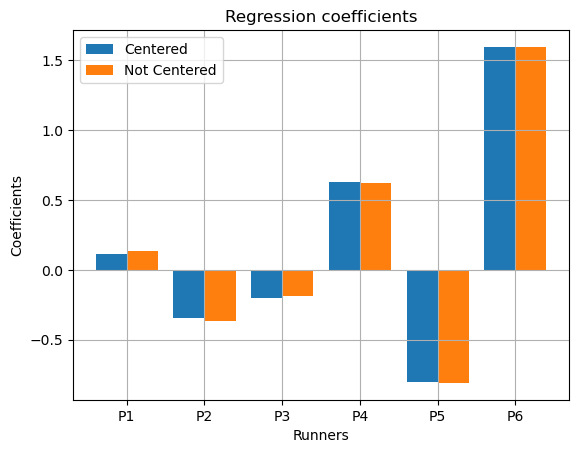

In [53]:
centered_coefs = reg_centered.coef_
not_centered_coefs = reg_not_centered.coef_

X = ['P1','P2','P3','P4','P5','P6']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, centered_coefs[0], 0.4, label = 'Centered')
plt.bar(X_axis + 0.2, not_centered_coefs[0], 0.4, label = 'Not Centered')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Regression coefficients")
plt.legend()
plt.grid()
plt.show()

### Ejercicio 2. Estimación por regresión lineal con regularización

#### Ridge centralizado

In [54]:
c_ridge_0 = Ridge(alpha = 0).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c_ridge_3 = Ridge(alpha = 3).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c_ridge_5 = Ridge(alpha = 5).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c_ridge_15 = Ridge(alpha = 15).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c_ridge_50 = Ridge(alpha = 50).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])

In [55]:
c_prediction_0 = c_ridge_0.predict(test_df[['P1','P2','P3','P4','P5','P6']])
c_prediction_3 = c_ridge_3.predict(test_df[['P1','P2','P3','P4','P5','P6']])
c_prediction_5 = c_ridge_5.predict(test_df[['P1','P2','P3','P4','P5','P6']])
c_prediction_15 = c_ridge_15.predict(test_df[['P1','P2','P3','P4','P5','P6']])
c_prediction_50 = c_ridge_50.predict(test_df[['P1','P2','P3','P4','P5','P6']])

In [56]:
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_0, squared=False), 2)} for alpha = 0')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_3, squared=False), 2)} for alpha = 3')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_5, squared=False), 2)} for alpha = 5')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_15, squared=False), 2)} for alpha = 15')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_50, squared=False), 2)} for alpha = 50')

Mean Squared Error: 14.03 for alpha = 0
Mean Squared Error: 14.02 for alpha = 3
Mean Squared Error: 14.02 for alpha = 5
Mean Squared Error: 14.01 for alpha = 15
Mean Squared Error: 13.97 for alpha = 50


#### Ridge sin centralizar

In [57]:
ridge_0 = Ridge(alpha = 0, fit_intercept=False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
ridge_3 = Ridge(alpha = 3, fit_intercept=False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
ridge_5 = Ridge(alpha = 5, fit_intercept=False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
ridge_15 = Ridge(alpha = 15, fit_intercept= False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
ridge_50 = Ridge(alpha = 50, fit_intercept= False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])

In [58]:
prediction_0 = ridge_0.predict(test_df[['P1','P2','P3','P4','P5','P6']])
prediction_3 = ridge_3.predict(test_df[['P1','P2','P3','P4','P5','P6']])
prediction_5 = ridge_5.predict(test_df[['P1','P2','P3','P4','P5','P6']])
prediction_15 = ridge_15.predict(test_df[['P1','P2','P3','P4','P5','P6']])
prediction_50 = ridge_50.predict(test_df[['P1','P2','P3','P4','P5','P6']])

In [59]:
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_0, squared=False), 2)} for alpha = 0')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_3, squared=False), 2)} for alpha = 3')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_5, squared=False), 2)} for alpha = 5')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_15, squared=False), 2)} for alpha = 15')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_50, squared=False), 2)} for alpha = 50')

Mean Squared Error: 14.05 for alpha = 0
Mean Squared Error: 14.05 for alpha = 3
Mean Squared Error: 14.04 for alpha = 5
Mean Squared Error: 14.03 for alpha = 15
Mean Squared Error: 13.99 for alpha = 50


#### Barplot de Ridge centralizado

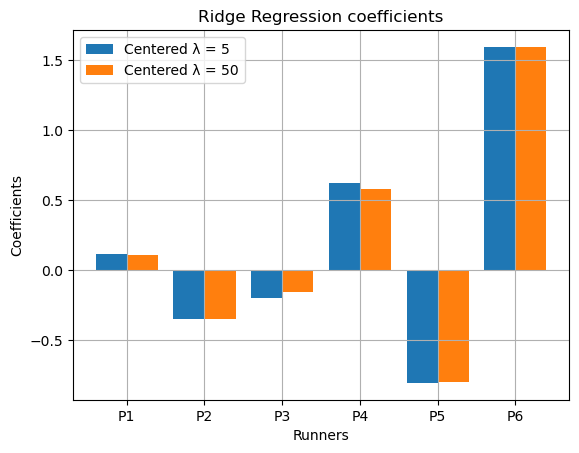

In [60]:
centered_L2_coefs1 = c_ridge_5.coef_
centered_L2_coefs2 = c_ridge_50.coef_

X = ['P1','P2','P3','P4','P5','P6']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, centered_L2_coefs1[0], 0.4, label = 'Centered λ = 5')
plt.bar(X_axis + 0.2, centered_L2_coefs2[0], 0.4, label = 'Centered λ = 50')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Ridge Regression coefficients")
plt.legend()
plt.grid()
plt.show()

#### Barplot de Ridge sin centralizar

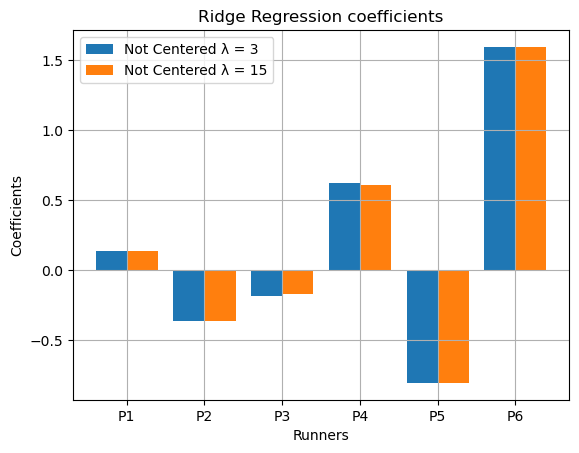

In [61]:
L2_coefs1 = ridge_3.coef_
L2_coefs2 = ridge_15.coef_

X = ['P1','P2','P3','P4','P5','P6']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, L2_coefs1[0], 0.4, label = 'Not Centered λ = 3')
plt.bar(X_axis + 0.2, L2_coefs2[0], 0.4, label = 'Not Centered λ = 15')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Ridge Regression coefficients")
plt.legend()
plt.grid()
plt.show()

#### Lasso centralizado

In [62]:
c_lasso_0 = Lasso(alpha = 0).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c_lasso_10 = Lasso(alpha = 10).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c_lasso_30 = Lasso(alpha = 30).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c_lasso_50 = Lasso(alpha = 50).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c_lasso_100 = Lasso(alpha = 100).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])

C:\Users\34635\AppData\Local\Temp\ipykernel_728\2018346323.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  c_lasso_0 = Lasso(alpha = 0).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c:\Users\34635\miniconda3\envs\aedv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\34635\miniconda3\envs\aedv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+04, tolerance: 5.634e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

In [63]:
c_prediction_0 = c_lasso_0.predict(test_df[['P1','P2','P3','P4','P5','P6']])
c_prediction_10 = c_lasso_10.predict(test_df[['P1','P2','P3','P4','P5','P6']])
c_prediction_30 = c_lasso_30.predict(test_df[['P1','P2','P3','P4','P5','P6']])
c_prediction_50 = c_lasso_50.predict(test_df[['P1','P2','P3','P4','P5','P6']])
c_prediction_100 = c_lasso_100.predict(test_df[['P1','P2','P3','P4','P5','P6']])

In [64]:
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_0, squared=False), 2)} for alpha = 0')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_10, squared=False), 2)} for alpha = 10')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_30, squared=False), 2)} for alpha = 30')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_50, squared=False), 2)} for alpha = 50')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], c_prediction_100, squared=False), 2)} for alpha = 100')

Mean Squared Error: 13.89 for alpha = 0
Mean Squared Error: 12.65 for alpha = 10
Mean Squared Error: 12.6 for alpha = 30
Mean Squared Error: 13.25 for alpha = 50
Mean Squared Error: 13.39 for alpha = 100


#### Lasso sin centralizar

In [65]:
lasso_0 = Lasso(alpha = 0, fit_intercept=False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
lasso_10 = Lasso(alpha = 10, fit_intercept=False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
lasso_30 = Lasso(alpha = 30, fit_intercept=False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
lasso_50 = Lasso(alpha = 50, fit_intercept= False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
lasso_100 = Lasso(alpha = 100, fit_intercept= False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])

C:\Users\34635\AppData\Local\Temp\ipykernel_728\270578445.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_0 = Lasso(alpha = 0, fit_intercept=False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])
c:\Users\34635\miniconda3\envs\aedv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\34635\miniconda3\envs\aedv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.332e+04, tolerance: 1.484e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

In [66]:
prediction_0 = lasso_0.predict(test_df[['P1','P2','P3','P4','P5','P6']])
prediction_10 = lasso_10.predict(test_df[['P1','P2','P3','P4','P5','P6']])
prediction_30 = lasso_30.predict(test_df[['P1','P2','P3','P4','P5','P6']])
prediction_50 = lasso_50.predict(test_df[['P1','P2','P3','P4','P5','P6']])
prediction_100 = lasso_100.predict(test_df[['P1','P2','P3','P4','P5','P6']])

In [67]:
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_0, squared=False), 2)} for alpha = 0')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_10, squared=False), 2)} for alpha = 10')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_30, squared=False), 2)} for alpha = 30')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_50, squared=False), 2)} for alpha = 50')
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_100, squared=False), 2)} for alpha = 100')

Mean Squared Error: 21.19 for alpha = 0
Mean Squared Error: 20.82 for alpha = 10
Mean Squared Error: 20.14 for alpha = 30
Mean Squared Error: 19.44 for alpha = 50
Mean Squared Error: 18.1 for alpha = 100


#### Barplot de Lasso centralizado

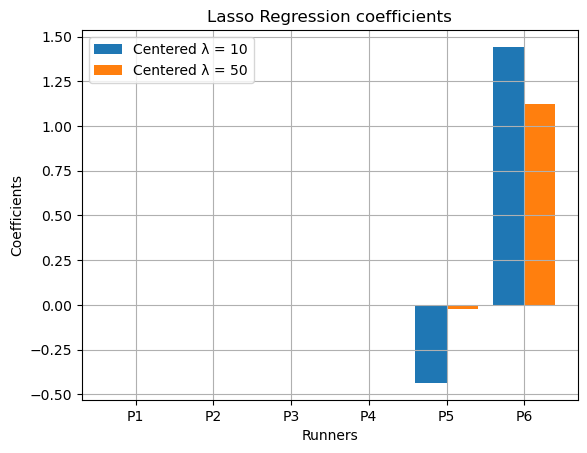

In [68]:
centered_L1_coefs1 = c_lasso_10.coef_
centered_L1_coefs2 = c_lasso_50.coef_

X = ['P1','P2','P3','P4','P5','P6']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, centered_L1_coefs1, 0.4, label = 'Centered λ = 10')
plt.bar(X_axis + 0.2, centered_L1_coefs2, 0.4, label = 'Centered λ = 50')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Lasso Regression coefficients")
plt.legend()
plt.grid()
plt.show()

#### Barplot de Lasso sin centralizar

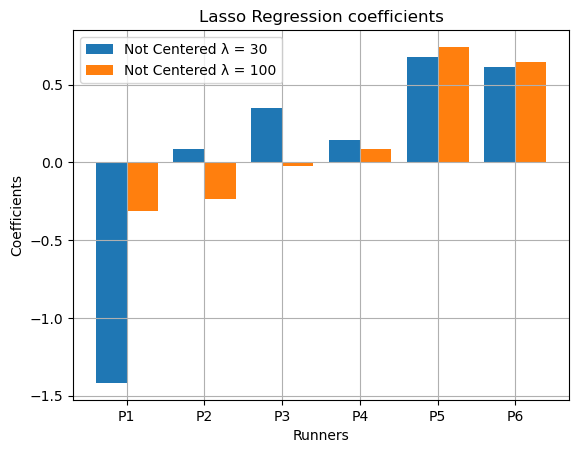

In [69]:
L1_coefs1 = lasso_30.coef_
L1_coefs2 = lasso_100.coef_

X = ['P1','P2','P3','P4','P5','P6']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, L1_coefs1, 0.4, label = 'Not Centered λ = 30')
plt.bar(X_axis + 0.2, L1_coefs2, 0.4, label = 'Not Centered λ = 100')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Lasso Regression coefficients")
plt.legend()
plt.grid()
plt.show()